**Assignment Code: DS-AG-019**

**Neural Network - A Simple Perceptron**

**Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs
 from traditional machine learning.**

**Answer:** Deep Learning is an advanced branch of machine learning that uses artificial neural networks with many layers to learn complex patterns from large amounts of data. It evolved from early neural network research in the 1980s, but significant progress began after 2010 due to better GPUs, big data availability, and improved algorithms like ReLU and backpropagation. Unlike traditional machine learning, deep learning automatically extracts features from raw data, avoiding manual feature engineering. It performs exceptionally well in tasks like image recognition, speech processing, and natural language understanding due to its ability to learn hierarchical representations.

**Question 2: Explain the basic architecture and functioning of a Perceptron. What are its
limitations?**

**Answer:** A Perceptron is the simplest neural network unit that mimics a biological neuron. Its architecture includes inputs, weights, a bias, a weighted sum, and an activation function (usually a step function). It takes input values, multiplies them by weights, adds the bias, and then passes the result through the activation function to produce an output of either 0 or 1.

However, the perceptron has major limitations. It can only solve linearly separable problems, cannot handle complex patterns, and fails on tasks like XOR. It also lacks multi-layer learning capabilities.

**Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.**


**Answer:** Activation functions give non-linearity to a neural network, allowing it to learn complex patterns instead of just linear relationships. They help neurons decide whether to activate based on input signals, enabling deep networks to approximate complicated functions.

Sigmoid squashes values between 0 and 1, useful for probabilities but suffers from vanishing gradients.
Tanh ranges from –1 to 1, is zero-centered, and performs better than sigmoid but still faces gradient issues.
ReLU outputs zero for negative inputs and linear for positive ones, making it fast and widely used, though it may cause “dead neurons.”

**Question 4: What is the difference between Loss function and Cost function in neural
networks? Provide examples.**

**Answer:** A loss function measures the error for a single training example. It tells how far the model’s prediction is from the actual target for one data point. Examples include Mean Squared Error (MSE) for regression and Binary Cross-Entropy for binary classification.

A cost function is the average of the loss values over the entire training dataset or a batch. It represents the model’s overall performance during training. Common cost functions include Categorical Cross-Entropy and Mean Absolute Error (MAE). In short, loss is for one sample, while cost summarizes the error across multiple samples.

**Question 5: What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.**

**Answer:** **Optimizers** help a neural network update its weights efficiently so the model can reduce error and learn effectively. They guide how fast and in what direction the weights should move during training.

**Gradient Descent** updates weights using the full dataset; it is simple but slow and computationally heavy.
RMSprop uses a moving average of squared gradients, making it good for handling non-stationary and noisy data.
**Adam** combines RMSprop and Momentum, adapting learning rates for each parameter. It is fast, stable, and widely used for most deep learning tasks.

**● Use NumPy, Matplotlib, and Tensorflow/Keras for implementation.**

**Question 6: Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.**

**Answer.**

In [ ]:

import numpy as np

# AND gate dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])   # AND outputs

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand()
learning_rate = 0.1
epochs = 20

# Activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Training perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        prediction = step_function(linear_output)

        # Update rule
        error = y[i] - prediction
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print("Final Weights:", weights)
print("Final Bias:", bias)

# Testing perceptron
print("\nTesting AND gate:")
for i in range(len(X)):
    linear_output = np.dot(X[i], weights) + bias
    prediction = step_function(linear_output)
    print(f"{X[i]} -> {prediction}")

Final Weights: [0.2296818  0.08035876]
Final Bias: -0.24720362207856175

Testing AND gate:
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


**Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.**

**Answer.**

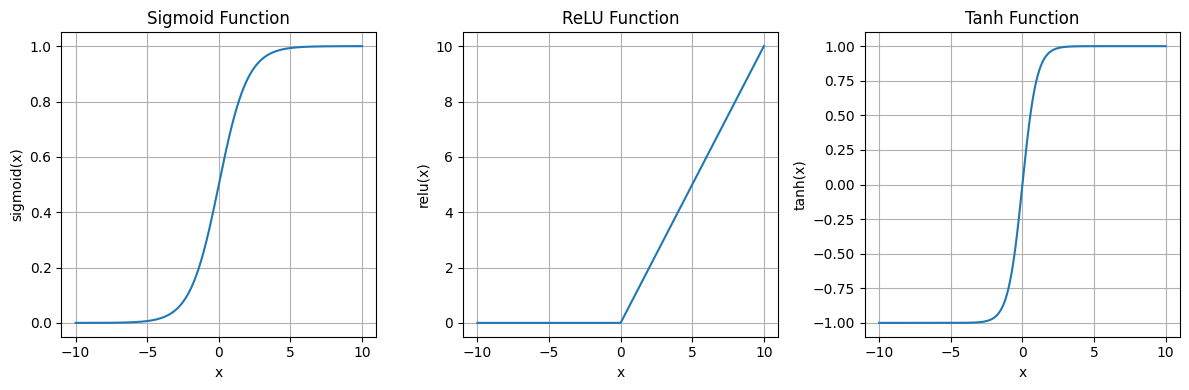

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Input range
x = np.linspace(-10, 10, 500)

# Compute outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plotting
plt.figure(figsize=(12, 4))

# Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)

# ReLU
plt.subplot(1, 3, 2)
plt.plot(x, y_relu)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.grid(True)

# Tanh
plt.subplot(1, 3, 3)
plt.plot(x, y_tanh)
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

**Question 8: Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.**

**Answer.**

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build a simple MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Print training accuracy
print("Training Accuracy:", history.history['accuracy'][-1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8728 - loss: 0.4357
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9671 - loss: 0.1097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0688
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9829 - loss: 0.0517
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9880 - loss: 0.0376
Training Accuracy: 0.9862833619117737


**Question 9: Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.**

**Answer.**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7577 - loss: 0.6855 - val_accuracy: 0.8397 - val_loss: 0.4521
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8638 - loss: 0.3840 - val_accuracy: 0.8693 - val_loss: 0.3604
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8751 - loss: 0.3387 - val_accuracy: 0.8763 - val_loss: 0.3486
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8850 - loss: 0.3124 - val_accuracy: 0.8729 - val_loss: 0.3573
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8884 - loss: 0.3012 - val_accuracy: 0.8742 - val_loss: 0.3529
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8962 - loss: 0.2854 - val_accuracy: 0.8597 - val_loss: 0.3834
Epoch 7/10
1500/1500 ━━━━━━━━━━

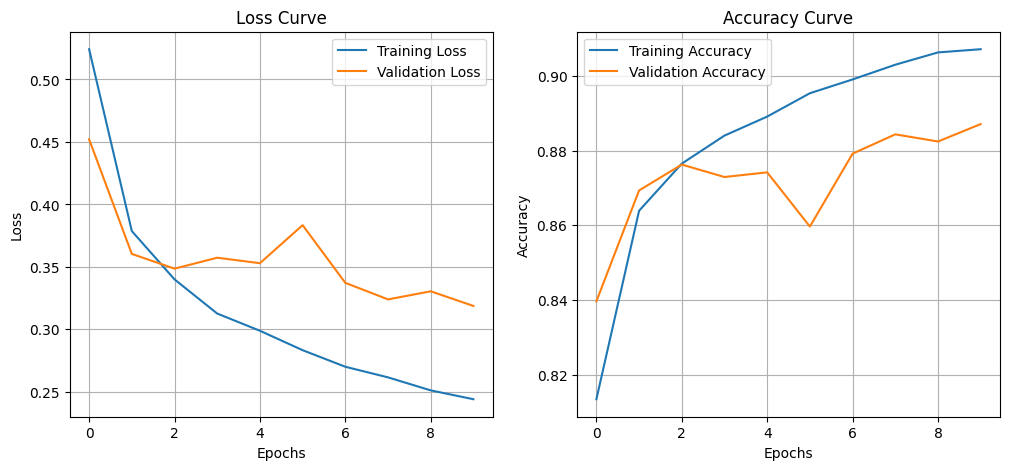

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot loss & accuracy
plt.figure(figsize=(12,5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()

The loss and accuracy curves show how well the model learns during training. Typically, training loss decreases steadily, indicating the model is fitting the data. Validation loss may decrease initially but can rise later, signaling overfitting. Accuracy curves help confirm learning progress—training accuracy usually increases faster than validation accuracy. If both training and validation accuracy rise together, the model is generalizing well. However, a growing gap between them indicates overfitting. Fashion MNIST usually shows smooth learning curves, where ReLU layers and Adam optimizer help achieve strong accuracy with stable convergence.

**Question 10: You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:**

● How would you design a deep learning model (perceptron or multilayer NN)?
● Which activation function and loss function would you use, and why?

● How would you train and evaluate the model, considering class imbalance?

● Which optimizer would be suitable, and how would you prevent overfitting?

**Answer.** For detecting fraudulent transactions in a bank, the first step is designing an appropriate deep learning model. Since the dataset contains structured features such as transaction amount, merchant ID, and customer location, a multilayer neural network (MLP) is suitable. The input layer will have neurons equal to the number of features. One or two hidden layers with ReLU activation can efficiently capture complex, non-linear patterns in the data, while the output layer will use a sigmoid activation function to provide probabilities for binary classification: fraudulent or legitimate.

The binary cross-entropy loss function is ideal because it measures the difference between predicted probabilities and actual labels, effectively guiding the model to improve classification performance. Class imbalance is a critical issue since fraudulent transactions are much fewer than legitimate ones. To address this, I would implement class weighting, where higher weights are assigned to the minority class, or use oversampling techniques such as SMOTE to balance the dataset. During training, evaluation should focus on precision, recall, and F1-score, as accuracy alone can be misleading in imbalanced datasets.

For optimization, the Adam optimizer is preferred due to its adaptive learning rate and ability to converge quickly on large datasets. To prevent overfitting, dropout layers can be added to randomly deactivate neurons during training, along with L2 regularization. Early stopping based on validation performance can ensure that training halts before the model memorizes the training data. Additionally, monitoring learning curves for both training and validation sets will help fine-tune the model.

This workflow ensures that the model not only learns efficiently from large, complex data but also generalizes well to unseen transactions, providing reliable detection of fraudulent activity in real time.